### Schools information retrieval

*Author: Liubov, Lecturers without borders*

Retrieve information about places around the point given location.
Input: Coordinates, Openstreetmap. Output: list of schools, suggested to a person. 
Packages used:

https://help.openstreetmap.org/questions/11004/download-a-map-and-extract-position-from-places-like-schools-hospitals-etc

Algorithm for objects identification from a map:
1. give coordinate (lat, lon)
2. send api call to openstreetmap 
3. get information about places around 

Alternatively if we need all the school data (~1 million of uses around the world), downloading planet file in PBF, which is only ~40 GB, and then we can filter them. 


### Openstreetmap API 

Openstreetmap (OSM) data types. There are 3 main data types: 
1. nodes (data points), 
2. ways (collection of points), the way on the other hand is a ordered list of nodes, which could correspond to a street or the outline of a house. 
3. relations.
There are also different types of amenities 
amenity "bar", or "highway" as we write below.
Example of parsing data is given in the blog https://towardsdatascience.com/loading-data-from-openstreetmap-with-python-and-the-overpass-api-513882a27fd0


### Make calls for api for schools around lat lon in given radius 

API calls from OSM 

1. https://wiki.openstreetmap.org/wiki/Overpass_API/Overpass_API_by_Example#Highway_around_schools_with_inappropriate_maxspeed_.28since_0.7.54.29 

2. https://towardsdatascience.com/loading-data-from-openstreetmap-with-python-and-the-overpass-api-513882a27fd0 

3. https://automating-gis-processes.github.io/CSC/notebooks/L3/retrieve_osm_data.html


We will get some available open infromation about schools in certain area. 

loading graph of city


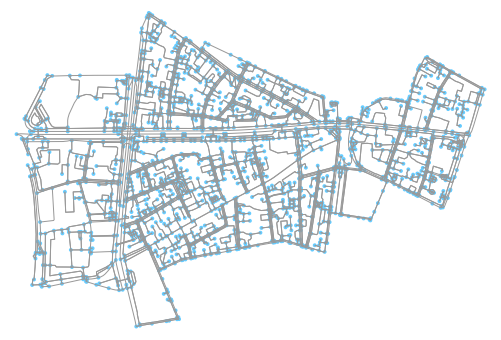

loading places


ConnectionError: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))

In [1]:
import json # requests for APIs
import requests #load Python code that allow us to work with the JSON data format and the HTTP protocol

import osmnx as ox
import matplotlib.pyplot as plt
%matplotlib inline

# https://www.digitalocean.com/community/tutorials/how-to-use-web-apis-in-python-3
# https://automating-gis-processes.github.io/CSC/notebooks/L3/retrieve_osm_data.html


# Specify the name that is used to seach for the data
place_name = "Arbat, Moscow, Russia"# Kremlin, Arbat "Kamppi, Helsinki, Finland"


# Fetch OSM street network from the location
graph = ox.graph_from_place(place_name)
type(graph)

print('loading graph of city')

# Plot the streets
fig, ax = ox.plot_graph(graph)


# Retrieve the footprint of our location
area = ox.gdf_from_place(place_name)
print('loading places')

# Retrieve buildings from the area
#buildings = ox.footprints(place_name) #buildings_from_place(place_name)

# What types are those? if there is any information about buildings_from_place
#print(type(area))
#print(type(buildings))

# Retrieve restaurants
restaurants = ox.pois_from_place(place_name, amenities=['restaurant'])

schools = ox.pois_from_place(place_name, amenities=['school'])


# How many schools do we have in this district?
len(schools)

# Available columns and names of amenity we are searching for
schools.columns

### Retrieve information about places 
Given certain coordinate we want now to get the information about places around certain coordinate. 

In [14]:
# Select some useful cols and print about contact emails 

cols = ['access', 'contact:email', 'contact:phone', 
        'addr:housenumber', 'addr:street'] #, 'addr:postcode' 'addr:country',
# Print only selected cols
schools[cols].head(10)



,access,contact:email,contact:phone,addr:housenumber,addr:street
1839995160,private,NaN,NaN,NaN,NaN
1867872481,NaN,NaN,NaN,NaN,NaN
1921838442,NaN,NaN,NaN,NaN,NaN
2591601499,NaN,NaN,NaN,NaN,NaN
2591601502,NaN,NaN,NaN,NaN,NaN
2607957146,NaN,NaN,+7 495 6902162,NaN,NaN
2984341935,NaN,NaN,+7 962 9925132,NaN,NaN
3343744246,NaN,NaN,NaN,NaN,NaN
3343744267,NaN,NaN,NaN,NaN,NaN
3366397734,NaN,NaN,NaN,NaN,NaN


In [11]:
import json # requests for APIs
import requests #load Python code that allow us to work with the JSON data format and the HTTP protocol

import osmnx as ox
import matplotlib.pyplot as plt

def school_info(name_city_distr): 
    ''' given city district get information about schools there
    phone or email, 
    availability of data 
    format of name_city_distr "Kamppi, Helsinki, Finland"
    
    name_city_distr must be a shapely Polygon or MultiPolygon. If you requested graph from place name or address, make sure your query resolves to a Polygon or MultiPolygon, and not some other geometry, like a Point. See OSMnx documentation for details.
    '''
    
    place_name = name_city_distr # e.g. "Kamppi, Helsinki, Finland"


    # Fetch OSM street network from the location
    graph = ox.graph_from_place(place_name)
    type(graph)

    print('loading graph of city')

    # Plot the streets
#    fig, ax = ox.plot_graph(graph)


    # Retrieve the footprint of our location
    area = ox.gdf_from_place(place_name)
    print('loading places')
    

    # Retrieve schools
    schools = ox.pois_from_place(place_name, amenities=['school'])

    # How many schools do we have in this district?
    len(schools)

    # Available columns and names of amenity we are searching for
    print(schools.columns)    # not all places have the same columns!!!
    
    cols = schools.columns
    #cols = ['access', 'contact:email', 'contact:phone',         'addr:housenumber', 'addr:street', 'education'] #, 'addr:postcode' 'addr:country',
    # Print only selected cols
    print(schools[cols].head(20))
    
def print_map_graph(place):
    
    place_name = name_city_distr # e.g. "Kamppi, Helsinki, Finland"


    # Fetch OSM street network from the location
    graph = ox.graph_from_place(place_name)
    type(graph)

    print('loading graph of city')

    # Plot the streets
    fig, ax = ox.plot_graph(graph)

    
    
def extract_network_city(place):
    '''extract network from city
    we use http://osm-traffic.com/ whichc allows direct download of graph data from OpenStreetMap in json format.
    '''
    print('extracting network from the city')
    

In [12]:
school_info('Gibraltar, Senegal')

#for Senegal we get access only to 
#'addr:city', 'amenity', 'barrier', 'element_type', 'geometry', 'name', 'nodes', 'osmid', 'school:SN'

loading graph of city
loading places
Index(['addr:city', 'amenity', 'barrier', 'element_type', 'geometry', 'name',
       'nodes', 'osmid', 'school:SN'],
      dtype='object')
          addr:city amenity barrier element_type  \
289045780     Dakar  school    wall          way   
476010605       NaN     NaN     NaN          way   

                                                    geometry  \
289045780  POLYGON ((-17.4436145 14.690805, -17.4432959 1...   
476010605  POLYGON ((-17.4425698 14.6818033, -17.4420953 ...   

                                       name  \
289045780  École primaire de la Gendarmerie   
476010605                               NaN   

                                                       nodes      osmid  \
289045780  [2925997287, 2925997288, 2925997289, 292599729...  289045780   
476010605  [4696772931, 2925913741, 2925913742, 292591374...  476010605   

          school:SN  
289045780  primaire  
476010605       NaN  


In [ ]:
#call function 

print_map_graph("Innopolis, Russia")

loading graph of city


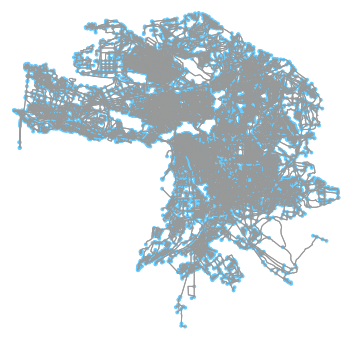

loading places


In [17]:

print_map_graph("Kazan, Russia")

In [26]:


school_info("Kazan, Russia")


loading graph of city
loading places
Index(['access', 'addr:housenumber', 'addr:postcode', 'addr:street', 'amenity',
       'barrier', 'bicycle', 'education', 'education_form:parttime',
       'education_level:primary', 'education_profile:driving',
       'education_profile:music', 'education_system:ru_standard',
       'element_type', 'email', 'entrance', 'foot', 'geometry', 'horse',
       'level', 'license_classes', 'man_made', 'motor_vehicle', 'name',
       'name:en', 'name:ru', 'name:tt', 'opening_hours', 'osmid', 'phone',
       'ref', 'surveillance', 'website', 'addr:city', 'addr:country',
       'addr:suburb', 'building', 'building:colour', 'building:levels',
       'fenced', 'full_name', 'government', 'int_name', 'language:ru',
       'language:tt', 'nodes', 'official_name', 'old_name', 'operator',
       'roof:shape', 'short_name', 'source', 'start_date',
       'toilets:wheelchair', 'wheelchair', 'wikipedia', 'type', 'ways',
       'wikidata', 'addr:place', 'contact:website

### Plotting schools on a map 
Let us plot all schools in area of some city to see spatial distribution of schools.

In [27]:
import numpy as np
import matplotlib.pyplot as plt# Collect coords into list
import requests
import json

#import data about country


coords = []

overpass_url = "http://overpass-api.de/api/interpreter"
overpass_query = """
[out:json];
area["ISO3166-1"="DE"][admin_level=2];
(node["amenity"="school"](area);
 way["amenity"="school"](area);
 rel["amenity"="school"](area);
);
out center;
"""
response = requests.get(overpass_url, 
                        params={'data': overpass_query})
data = response.json()

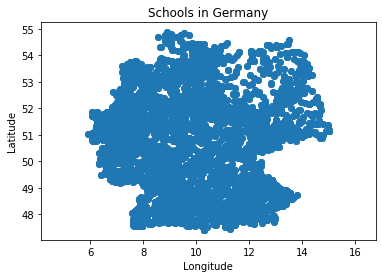

In [29]:
# plot data of amenities (e.g. schools or colleges)

for element in data['elements']:
  if element['type'] == 'node':
    lon = element['lon']
    lat = element['lat']
    coords.append((lon, lat))
  elif 'center' in element:
    lon = element['center']['lon']
    lat = element['center']['lat']
    coords.append((lon, lat))# Convert coordinates into numpy array
X = np.array(coords)
plt.plot(X[:, 0], X[:, 1], 'o')
plt.title('Schools in Germany')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.show()


### Calculation of radius and proportion of schools

Below we calculate shortest distances from given point R using functions from OSM for shortest path calculation.

In [ ]:
import osmnx as ox #openstreetmap
import networkx as nx


#Give coordinate of locations 

#Find schools in radius R from them 


#get shortest path beween nodes 
G.node[38862848]
#latitude of a node
G.node[38862848]['lat']

gdf_nodes, gdf_edges = ox.graph_to_gdfs()
path = nx.shortest_path(G, G.nodes()[0], G.nodes()[1])
gdf_nodes.loc[path]

### Overpass API for OSM

In [ ]:
import requests

overpass_url = "http://overpass-api.de/api/interpreter"
overpass_query = """
    [out:json];
    area["ISO3166-1"="DE"][admin_level=2]->.search;
    node[amenity="restaurant"](area.search);
    out count;"""
response = requests.get(overpass_url, params={'data': overpass_query})
response.json()

### TODO 
1. schools distribution and spatial characteristics in Senegal vs. Germany 
2. radius and proportion of schools for given random location
3. highlight places on a map where there is no information about contacts or emails (contribution with humanitarian OSM https://www.hotosm.org/)

In [2]:
# given coordinate of me (lat, lon) 
# send me locations of buildings in radius R from me (lat, lon), where information is missing 
# send me person buildings and code of building from OSM where information is missing 
